1D test case with a constant warm forcing  

* percolation on, no lateral movement of water
* initial conditions:
    ** temp -10oC at top getting colder towards bottom (-20oC)
    ** density 500 at top compacting to density of ice at bottom


* Lake formed on day 19
* No refreezing

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

expt_id = '001'

output_filepath = '1d_testcase_' + expt_id + '.nc' 
met_output_filepath = 'met_data_1d_'+ expt_id + '.nc'

met = nc.Dataset(met_output_filepath, 'r')
output = nc.Dataset(output_filepath, 'r')

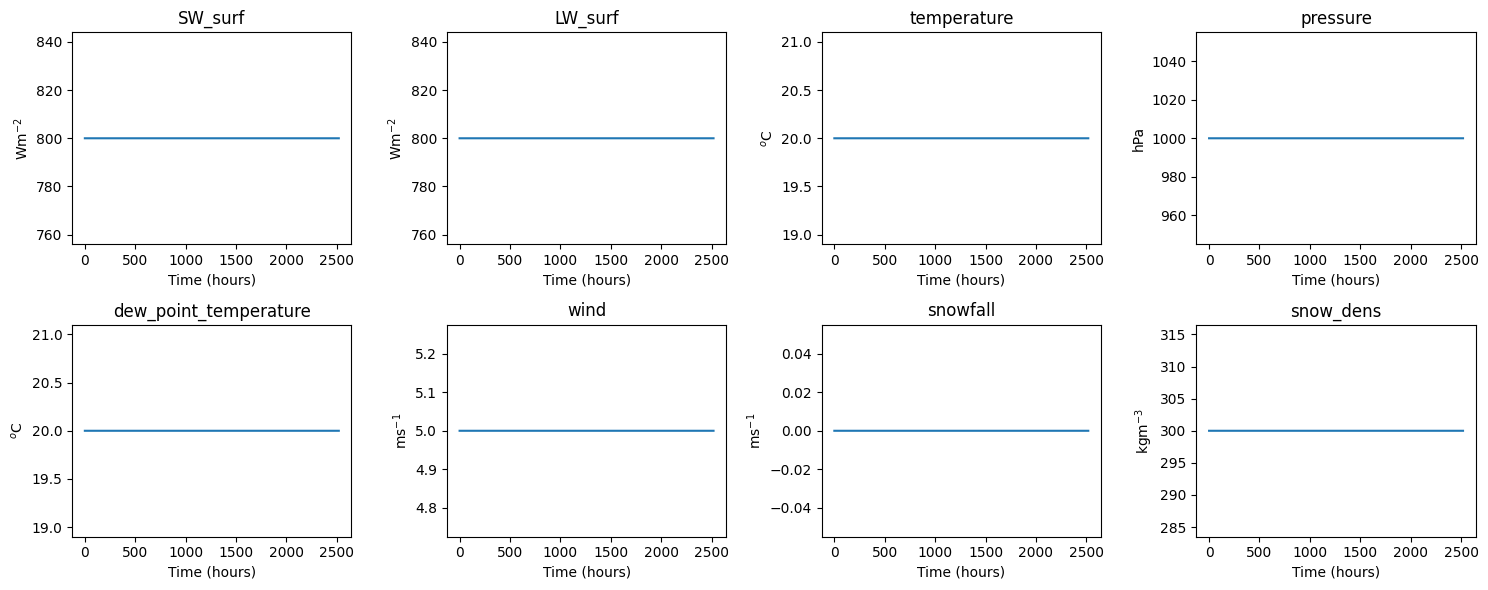

In [ ]:
met_vars = ['SW_surf', 'LW_surf', 'temperature', 'pressure',
            'dew_point_temperature', 'wind', 'snowfall', 'snow_dens']
met_units = ['Wm$^{-2}$', 'Wm$^{-2}$', '$^{o}$C', 'hPa',
             '$^{o}$C', 'ms$^{-1}$', 'ms$^{-1}$', 'kgm$^{-3}$']


fig, axes = plt.subplots(2, 4, figsize=(15, 6)) # w, h
axes = axes.flatten()

for i, var_name in enumerate(met_vars):
    ax = axes[i]
    data = met.variables[var_name][:, 0, 0]
    time = np.arange(len(data))

    if var_name in ['temperature', 'dew_point_temperature']:
        data = data - 273.15

    ax.plot(time, data)
    ax.set_title(var_name)
    ax.set_ylabel(met_units[i])
    ax.set_xlabel('Time (hours)')

plt.tight_layout()
plt.show()

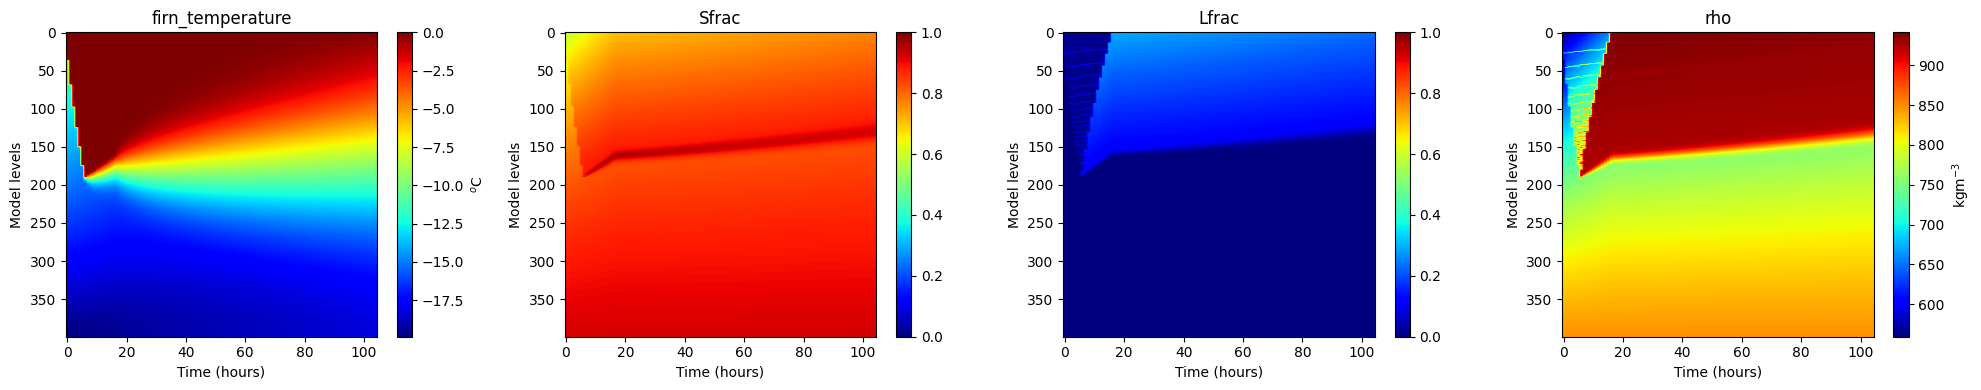

In [35]:
# 2d variables
firn_2d_vars = ['firn_temperature', 'Sfrac', 'Lfrac', 'rho']
firn_2d_units = ['$^{o}$C', ' ', ' ', 'kgm$^{-3}$']

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.flatten()

for i, var_name in enumerate(firn_2d_vars):
    ax = axes[i]
    data_2d = output.variables[var_name][1:, 0, 0, :]  # skip timestep 0 because of netCDF bug

    if var_name in ['firn_temperature']:
        data_2d = data_2d - 273.15

    if var_name in ['Sfrac', 'Lfrac']:
        im = ax.imshow(data_2d.T, aspect='auto', origin='lower', cmap='jet', vmin=0, vmax=1)
    else:
        im = ax.imshow(data_2d.T, aspect='auto', origin='lower', cmap='jet')
    
    ax.set_title(var_name)
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Model levels')
    ax.invert_yaxis()
    plt.colorbar(im, ax=ax, label=firn_2d_units[i])


plt.tight_layout()
plt.show()


Initial conditions

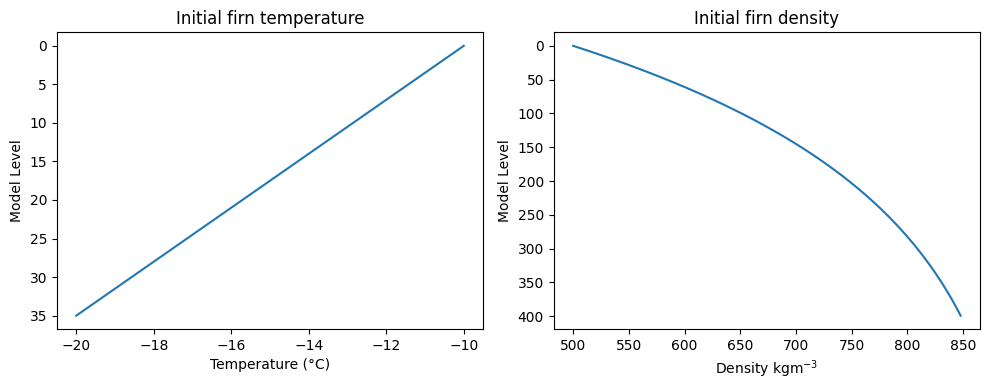

In [39]:
rho_sfc = 500
z_t  = 37
firn_depth = 35
vertical_points_firn = 400

T_init      = np.linspace(253.15, 263.15, vertical_points_firn)[::-1] # L108 initial_conditions.py
T_init_C    = T_init - 273.15  

z = np.linspace(0, firn_depth, vertical_points_firn)
rho = 917 - (917 - rho_sfc) * np.exp(-(1.9 / z_t) * z)  # L187 initial_conditions.py

time = np.arange(len(T_init))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

ax = axes[0]
ax.plot(T_init_C, z)
ax.set_title('Initial firn temperature')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Model Level')
ax.invert_yaxis()  

ax = axes[1]
ax.plot(rho, time)
ax.set_title('Initial firn density')
ax.set_xlabel('Density kgm$^{-3}$')
ax.set_ylabel('Model Level')
ax.invert_yaxis()

plt.tight_layout()
plt.show()


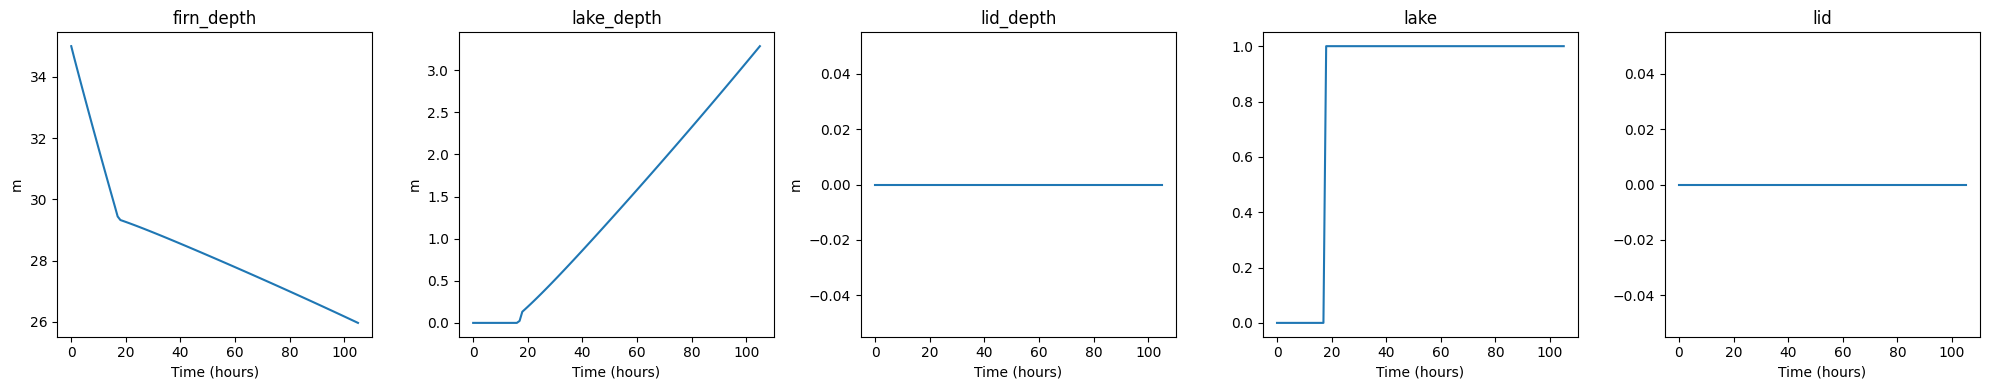

lake formed on day 19


In [32]:

firn_1d_vars = ['firn_depth', 'lake_depth', 'lid_depth', 'lake', 'lid']
firn_1d_units = ['m', 'm', 'm','', '']

fig, axes = plt.subplots(1, 5, figsize=(20, 4)) # w, h
axes = axes.flatten()

for i, var_name in enumerate(firn_1d_vars):
    ax = axes[i]
    data = output.variables[var_name][:, 0, 0]
    time = np.arange(len(data))
    
    ax.plot(time, data)
    ax.set_title(var_name)
    ax.set_ylabel(firn_1d_units[i])
    ax.set_xlabel('Time (hours)')

plt.tight_layout()
plt.show()

# --- check when/if a lake is formed
lake = output.variables['lake'][:, 0, 0]
first_lake_index = np.where(lake == 1)[0][0] if np.any(lake == 1) else None
print('lake formed on day', first_lake_index + 1)

In [ ]:
met.close()
output.close()